In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
order=pd.read_csv("netflix.csv")
order.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [13]:
print(order.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [15]:
# Fill missing values appropriately
order['director'].fillna('Not Available', inplace=True)
order['cast'].fillna('Not Available', inplace=True)
order['country'].fillna('Unknown', inplace=True)
order['date_added'].fillna('Not Available', inplace=True)
order['rating'].fillna(order['rating'].mode()[0], inplace=True)
order['duration'].fillna('Unknown', inplace=True)

C:\Users\kerala\AppData\Local\Temp\ipykernel_11548\2454590138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order['rating'].fillna(order['rating'].mode()[0], inplace=True)
C:\Users\kerala\AppData\Local\Temp\ipykernel_11548\2454590138.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

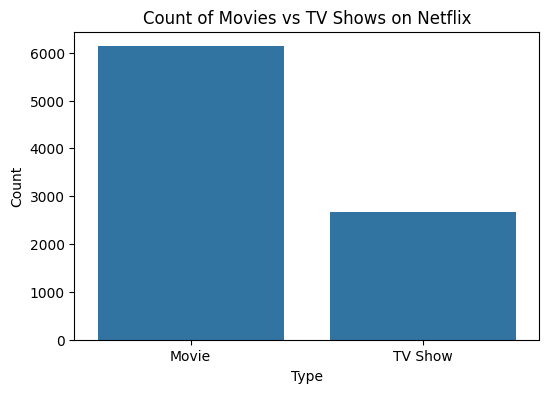

In [16]:
type_count = order['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values)

plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


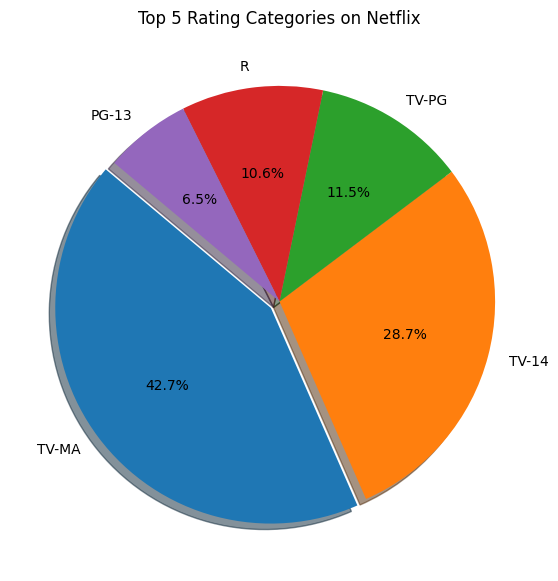

In [22]:
rating_count = order['rating'].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(rating_count.values,labels=rating_count.index,autopct='%1.1f%%',startangle=140,explode=(0.05,0,0,0,0),   
        shadow=True)

plt.title("Top 5 Rating Categories on Netflix")
plt.show()

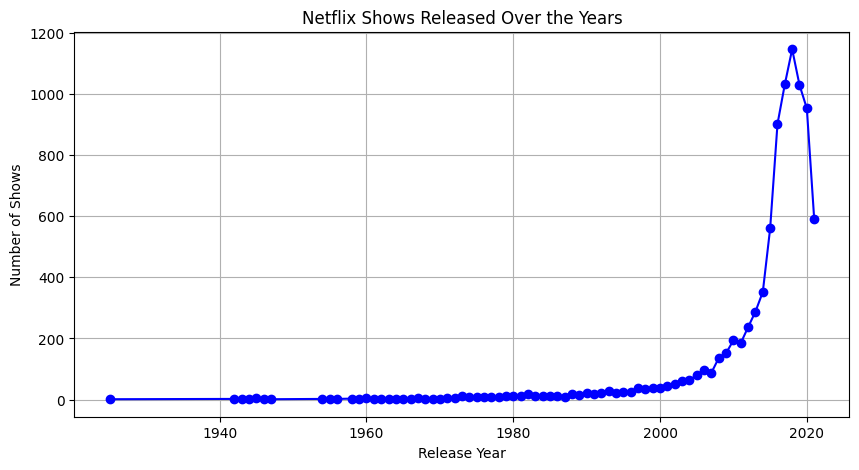

In [24]:
yearly_count = order['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_count.index, yearly_count.values, marker='o', linestyle='-', color='blue')

plt.title("Netflix Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.grid(True)

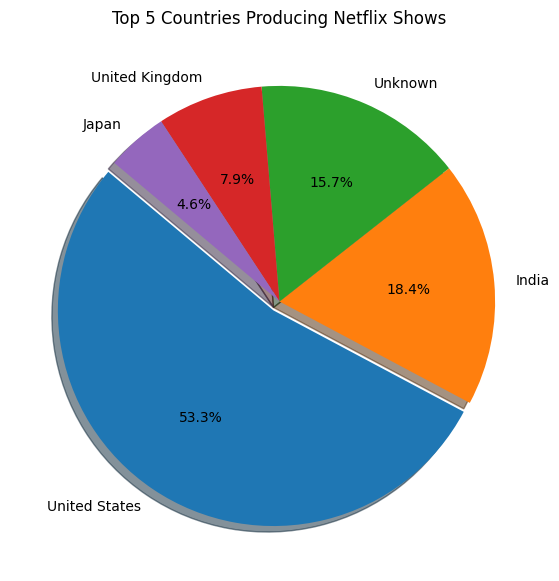

In [25]:
country_count = order['country'].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(country_count.values,labels=country_count.index,autopct='%1.1f%%',startangle=140,shadow=True,
        explode=(0.05,0,0,0,0))

plt.title("Top 5 Countries Producing Netflix Shows")
plt.show()

C:\Users\kerala\AppData\Local\Temp\ipykernel_11548\4029721761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre.values, y=genre.index, palette="coolwarm")


<Axes: ylabel='listed_in'>

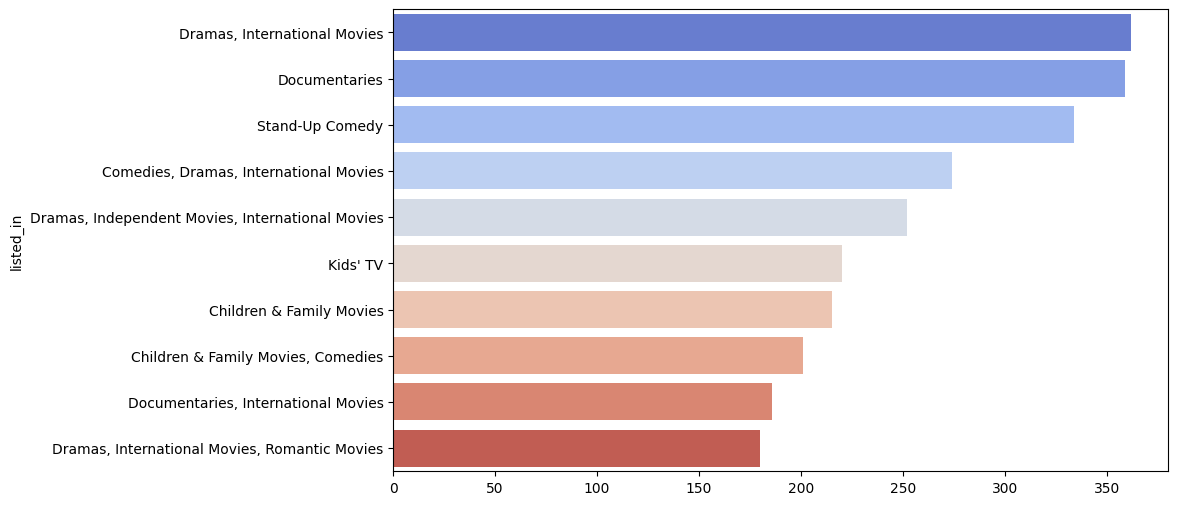

In [28]:
genre = order['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre.values, y=genre.index, palette="coolwarm")